<a href="https://colab.research.google.com/github/Vibenshus-Gymnasium-Pro/assignment-1-LunaStarwalker/blob/main/Greenhouse%20Emissions%20by%20Industry%20-%20Datascience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [11]:
path = '/content/Greenhouse-gas-emissions-industry-and-household-December-2021-quarter-csv.csv'
data = pd.read_csv(path)
data.head()

,Anzsic,Anzsic_description,Period,Data_value,Variable,Units,Gas,Status
0,ZPZ,Primary industries,2014Q1,11316,Seasonally adjusted,Kilotonnes,Carbon dioxide equivalents,P
1,ZPZ,Primary industries,2014Q2,11179,Seasonally adjusted,Kilotonnes,Carbon dioxide equivalents,P
2,ZPZ,Primary industries,2014Q3,11126,Seasonally adjusted,Kilotonnes,Carbon dioxide equivalents,P
3,ZPZ,Primary industries,2014Q4,11118,Seasonally adjusted,Kilotonnes,Carbon dioxide equivalents,P
4,ZPZ,Primary industries,2015Q1,11064,Seasonally adjusted,Kilotonnes,Carbon dioxide equivalents,P


In [3]:
data.drop(['Anzsic', 'Status', 'Gas','Period','Variable','Units'], axis = 1, inplace = True)

In [4]:
data.rename(columns = {'Anzsic_description' : 'Industry'}, inplace = True)
data.rename(columns = {'Data_value' : 'Emissions'}, inplace = True)
data.head()

,Industry,Emissions
0,Primary industries,11316
1,Primary industries,11179
2,Primary industries,11126
3,Primary industries,11118
4,Primary industries,11064


In [5]:
new_data = data.groupby("Industry")['Emissions'].sum().reset_index()

In [6]:
top_chart = new_data.sort_values(by = 'Emissions', ascending = False).reset_index(drop = True)

In [7]:
top_chart.drop([0,1], inplace = True)
top_chart.reset_index(drop = True)

,Industry,Emissions
0,Primary industries,704254
1,"Agriculture, forestry, fishing",681149
2,Goods-producing industries,331354
3,Manufacturing,181347
4,Service industries,140437
5,Households,135434
6,"Electricity, gas, water, and waste services",129076
7,Transport,120660
8,"Transport, postal, and warehousing",99559
9,"Services excluding transport, postal, and ware...",40849


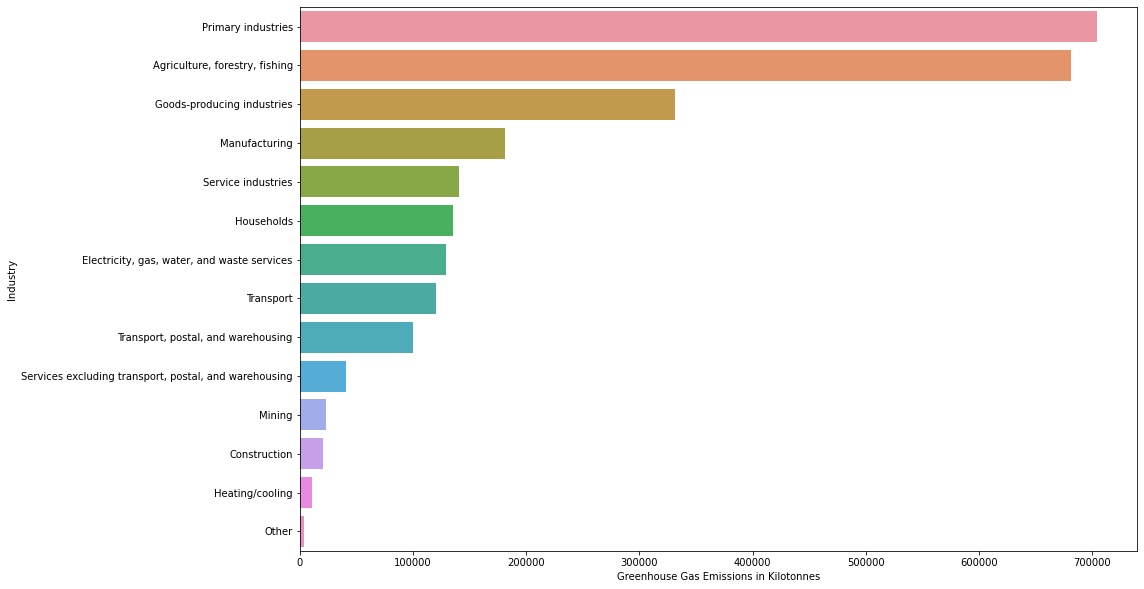

In [17]:
plt.figure(figsize = (15, 10))
plot = sns.barplot(x = top_chart['Emissions'], y =  top_chart['Industry'])
plot.set_xlabel("Greenhouse Gas Emissions in Kilotonnes")

plt.show()

In [19]:
fig = px.pie(top_chart, values='Emissions', names='Industry', title='Greenhouse Emissions by Industry [in Kilotonnes]')
fig.show()